In [43]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [45]:
def converte_classe(rotulo):
    return int(rotulo == ' >50K')

In [46]:
base['income'] = base['income'].apply(converte_classe)

In [47]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [48]:
base['income'].unique()

array([0, 1])

In [49]:
X = base.drop('income', axis=1)

In [50]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [51]:
y = base['income']

In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [53]:
type(y)

pandas.core.series.Series

<Axes: >

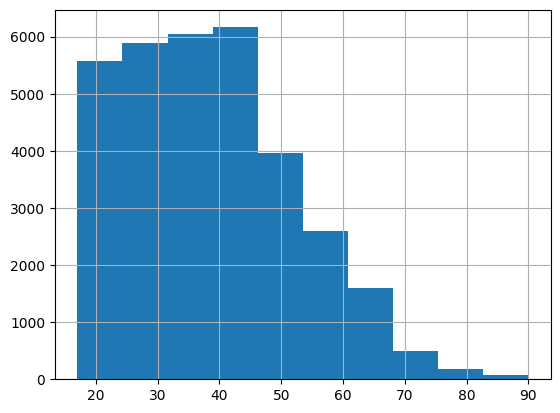

In [54]:
base.age.hist()

In [55]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [56]:
idade = tf.feature_column.numeric_column('age')

In [57]:
idade_categorica = [
    tf.feature_column.bucketized_column(idade, boundaries=[
        20, 30, 40, 50, 60, 70, 80, 90
    ])
]

In [58]:
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [59]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [60]:
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [61]:
X['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [62]:
X['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [63]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [64]:
colunas_categoricas = [
    tf.feature_column.categorical_column_with_vocabulary_list(
        key = c, vocabulary_list = X[c].unique()
    ) for c in nome_colunas_categoricas
]

In [65]:
print(colunas_categoricas[3])

VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [66]:
print(colunas_categoricas[-2])

VocabularyListCategoricalColumn(key='sex', vocabulary_list=(' Male', ' Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [80]:
nome_colunas_numericas = [
    'final-weight',
    'education-num',
    'capital-gain',
    'capital-loos',
    'hour-per-week',
]

In [81]:
colunas_numericas = [tf.feature_column.numeric_column(key=c) for c in nome_colunas_numericas]

In [82]:
print(colunas_numericas[0])

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [83]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [84]:
colunas

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90)),
 VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buck

In [85]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state = 42)

In [86]:
X_treinamento.shape, X_teste.shape

((22792, 14), (9769, 14))

In [87]:
def make_input_fn(X, y = None, num_epochs = None, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(X), y))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [88]:
funcao_treinamento = make_input_fn(X_treinamento, y_treinamento)

In [89]:
config = tf.estimator.RunConfig(tf_random_seed=24)
classificador = tf.estimator.LinearClassifier(feature_columns=colunas, config=config)

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnl_nvbda', '_tf_random_seed': 24, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [90]:
classificador.train(input_fn=funcao_treinamento, steps=10_000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.


2025-04-07 18:34:43.256924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-07 18:34:43.281849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-04-07 18:34:43.290591: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-04-07 18:34:43.41

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpnl_nvbda/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 474.549
INFO:tensorflow:loss = 419.5033, step = 100 (0.211 sec)
INFO:tensorflow:global_step/sec: 1353.22
INFO:tensorflow:loss = 950.53625, step = 200 (0.074 sec)
INFO:tensorflow:global_step/sec: 1168.87
INFO:tensorflow:loss = 741.1828, step = 300 (0.086 sec)
INFO:tensorflow:global_step/sec: 1149.75
INFO:tensorflow:loss = 524.70154, step = 400 (0.086 sec)
INFO:tensorflow:global_step/sec: 1115.58
INFO:tensorflow:loss = 266.64038, step = 500 (0.090 sec)
INFO:tensorflow:global_step/sec: 1212.04
INFO:tensorflow:loss = 108.149765, step = 600 (0.082 sec)
INFO:tensorflow:global_step/sec: 982.169
INFO:tensorflow:loss =